In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df= pd.read_csv("Groceries data.csv")

In [12]:
df.shape

(38765, 7)

In [13]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [14]:
data = pd.read_csv("market_basket.csv", header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [15]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


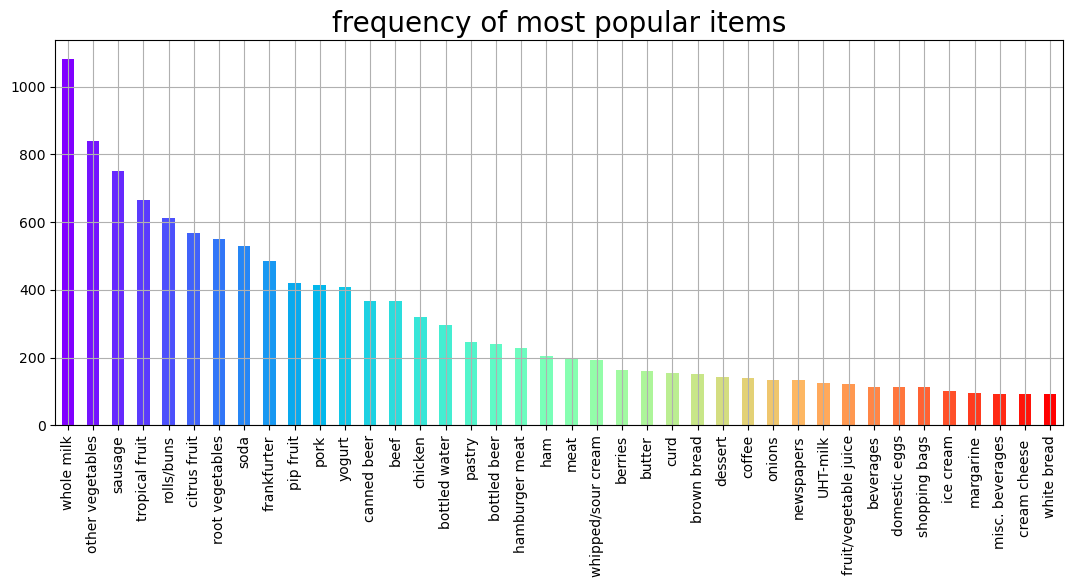

In [16]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [17]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

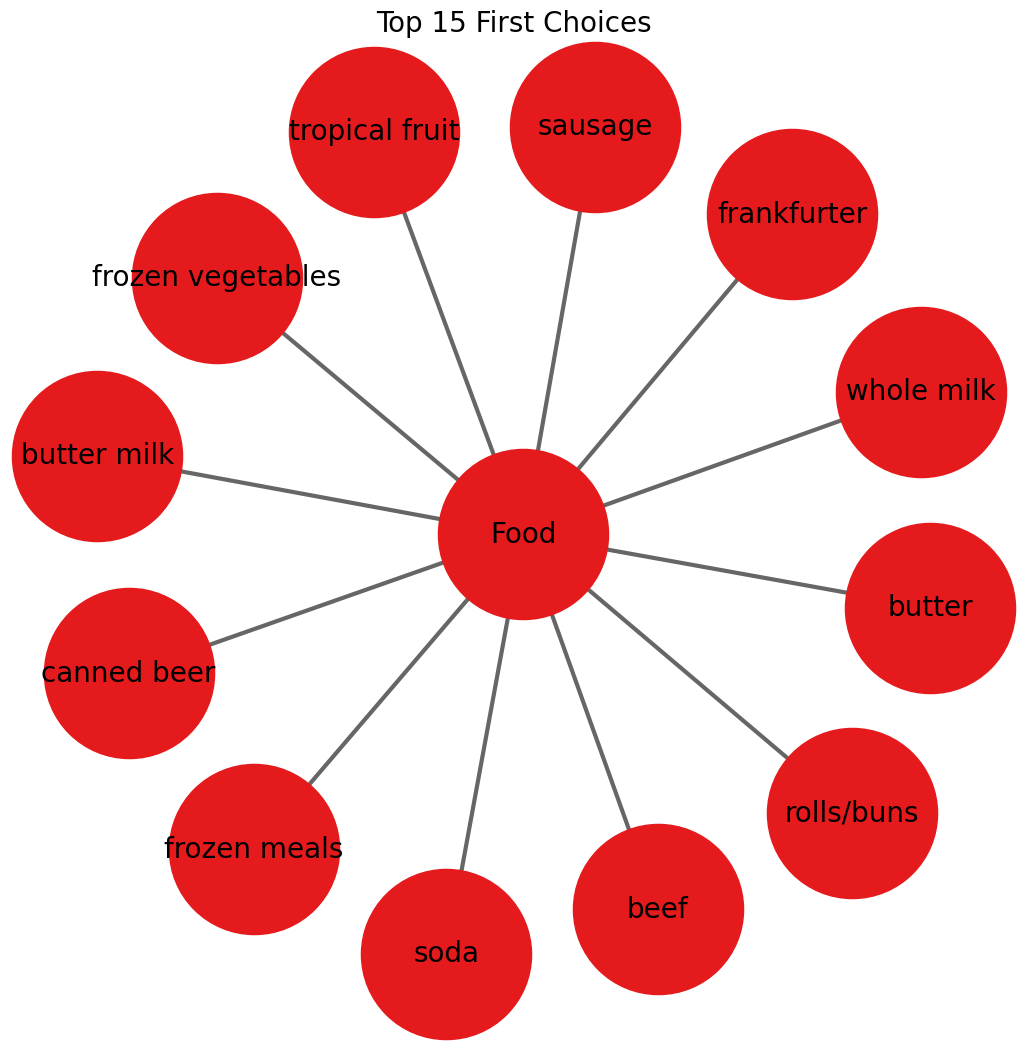

In [18]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [19]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [20]:
transactions[:1]

[['whole milk',
  'pastry',
  'salty snack',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'Food']]

In [21]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [22]:
print('# of items:',len(items))
print(list(items))

# of items: 169
['roll products ', 'whole milk', 'margarine', 'organic products', 'tea', 'potato products', 'cleaner', 'specialty bar', 'soap', 'frozen fruits', 'onions', 'bathroom cleaner', 'canned fish', 'liqueur', 'nan', 'softener', 'liver loaf', 'dish cleaner', 'ready soups', 'organic sausage', 'flour', 'specialty chocolate', 'processed cheese', 'oil', 'pet care', 'Food', 'toilet cleaner', 'sparkling wine', 'make up remover', 'pip fruit', 'napkins', 'candles', 'shopping bags', 'cream cheese ', 'frozen meals', 'long life bakery product', 'chicken', 'misc. beverages', 'chewing gum', 'female sanitary products', 'popcorn', 'rubbing alcohol', 'nuts/prunes', 'sweet spreads', 'vinegar', 'male cosmetics', 'flower (seeds)', 'brandy', 'rolls/buns', 'bottled beer', 'fruit/vegetable juice', 'frozen fish', 'tidbits', 'yogurt', 'hard cheese', 'sausage', 'cake bar', 'frozen vegetables', 'soft cheese', 'rum', 'pudding powder', 'finished products', 'cereals', 'salty snack', 'ham', 'house keeping pr

In [23]:
if 'nan' in items: items.remove('nan')
print(list(items))

['roll products ', 'whole milk', 'margarine', 'organic products', 'tea', 'potato products', 'cleaner', 'specialty bar', 'soap', 'frozen fruits', 'onions', 'bathroom cleaner', 'canned fish', 'liqueur', 'softener', 'liver loaf', 'dish cleaner', 'ready soups', 'organic sausage', 'flour', 'specialty chocolate', 'processed cheese', 'oil', 'pet care', 'Food', 'toilet cleaner', 'sparkling wine', 'make up remover', 'pip fruit', 'napkins', 'candles', 'shopping bags', 'cream cheese ', 'frozen meals', 'long life bakery product', 'chicken', 'misc. beverages', 'chewing gum', 'female sanitary products', 'popcorn', 'rubbing alcohol', 'nuts/prunes', 'sweet spreads', 'vinegar', 'male cosmetics', 'flower (seeds)', 'brandy', 'rolls/buns', 'bottled beer', 'fruit/vegetable juice', 'frozen fish', 'tidbits', 'yogurt', 'hard cheese', 'sausage', 'cake bar', 'frozen vegetables', 'soft cheese', 'rum', 'pudding powder', 'finished products', 'cereals', 'salty snack', 'ham', 'house keeping products', 'mustard', 'sa

In [24]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 28056
[('roll products ', 'whole milk'), ('roll products ', 'margarine'), ('roll products ', 'organic products'), ('roll products ', 'tea'), ('roll products ', 'potato products')]


In [46]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,Food,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
whole milk,0.157923
other vegetables,0.122101
rolls/buns,0.110005
soda,0.097106


In [48]:
support.describe()

,support
count,168.000000
mean,0.021071
std,0.079474
min,0.000067
25%,0.002055
50%,0.005814
75%,0.017760
max,1.000000


In [49]:
df.notnull().sum()

Member_number      38765
Date               38765
itemDescription    38765
year               38765
month              38765
day                38765
day_of_week        38765
dtype: int64

In [50]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [51]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [52]:
# Compute support for tropical fruit and whole milk
supportBF = np.logical_and(onehot['tropical fruit'], onehot['whole milk']).mean()

# Compute support for tropical fruit and pip fruit
supportBM = np.logical_and(onehot['tropical fruit'], onehot['pip fruit']).mean()

# Compute support for whole milk and pip fruit
supportFM = np.logical_and(onehot['whole milk'], onehot['pip fruit']).mean()

# Print support values
print("tropical fruit and whole milk: %.2f" % supportBF)
print("tropical fruit and pip fruit: %.2f" % supportBM)
print("whole milk and pip fruit: %.2f" % supportFM)

tropical fruit and whole milk: 0.01
tropical fruit and pip fruit: 0.00
whole milk and pip fruit: 0.01


In [53]:
#Computing the support metric
# Add a pip fruit + whole milk column to the DataFrame onehot
onehot['pip fruit + whole milk'] = np.logical_and(onehot['pip fruit'], onehot['whole milk'])

# Compute the support
support = onehot.mean()
val = support.loc['pip fruit + whole milk']

# Print the support values
print(f'pip fruit + whole milk support = {val}')

pip fruit + whole milk support = 0.006616320256633028


In [54]:
#Refining support with confidence
# Compute support for pip fruit and whole milk
supportMF = np.logical_and(onehot['pip fruit'], onehot['whole milk']).mean()

# Compute support for pip fruit
supportM = onehot['pip fruit'].mean()

# Compute support for whole milk
supportF = onehot['whole milk'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('pip fruit = {0:.2f}, whole milk = {1:.2f}'.format(confidenceMM, confidenceMF))

pip fruit = 0.13, whole milk = 0.04


In [55]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.85


In [56]:
# Compute support for tropical fruit AND whole milk
supportBF = np.logical_and(onehot['tropical fruit'], onehot['whole milk']).mean()

# Compute support for tropical fruit
supportB = onehot['tropical fruit'].mean()

# Compute support for NOT whole milk
supportnF = 1.0 - onehot['whole milk'].mean()

# Compute support for tropical fruit and NOT whole milk
supportBnF = supportB - supportBF

# Compute and print conviction for tropical fruit -> whole milk
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 0.96


In [57]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [58]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

In [59]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['tropical fruit'], onehot['whole milk'])
convictionFB = conviction(onehot['whole milk'], onehot['tropical fruit'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['tropical fruit'], onehot['pip fruit'])
convictionMB = conviction(onehot['pip fruit'], onehot['tropical fruit'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['whole milk'], onehot['pip fruit'])
convictionMF = conviction(onehot['pip fruit'], onehot['whole milk'])

# Print results
print('whole milk -> tropical fruit: ', convictionFB)
print('tropical fruit -> whole milk: ', convictionBF)

whole milk -> tropical fruit:  0.9834224121881594
tropical fruit -> whole milk:  0.9583234604954849


In [60]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,1.000000,(Food)
1,0.060683,(bottled water)
2,0.053131,(citrus fruit)
3,0.122101,(other vegetables)
4,0.051728,(pastry)


In [61]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

33 23


In [62]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

32 22


In [63]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         54 non-null     object 
 1   consequents         54 non-null     object 
 2   antecedent support  54 non-null     float64
 3   consequent support  54 non-null     float64
 4   support             54 non-null     float64
 5   confidence          54 non-null     float64
 6   lift                54 non-null     float64
 7   leverage            54 non-null     float64
 8   conviction          54 non-null     float64
 9   zhangs_metric       54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.3+ KB


In [64]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Food),(beef),1.000000,0.033950,0.033950,0.033950,1.0,0.0,1.0,0.0
1,(beef),(Food),0.033950,1.000000,0.033950,1.000000,1.0,0.0,inf,0.0
2,(bottled beer),(Food),0.045312,1.000000,0.045312,1.000000,1.0,0.0,inf,0.0
3,(Food),(bottled beer),1.000000,0.045312,0.045312,0.045312,1.0,0.0,1.0,0.0
4,(bottled water),(Food),0.060683,1.000000,0.060683,1.000000,1.0,0.0,inf,0.0


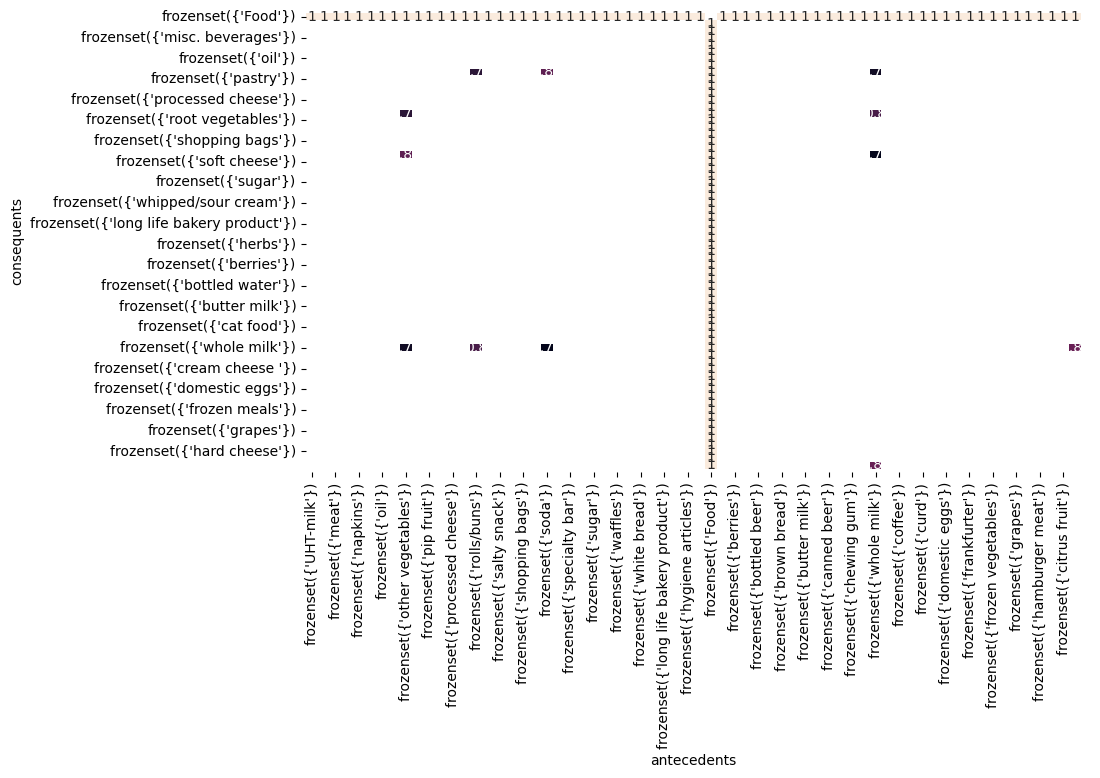

In [78]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

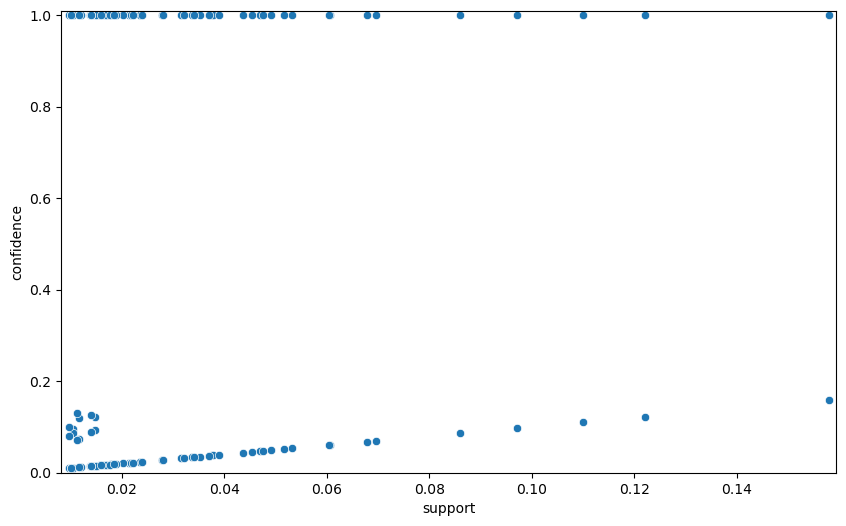

In [66]:
frequent_itemsets = apriori(onehot, min_support = 0.0095, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show()


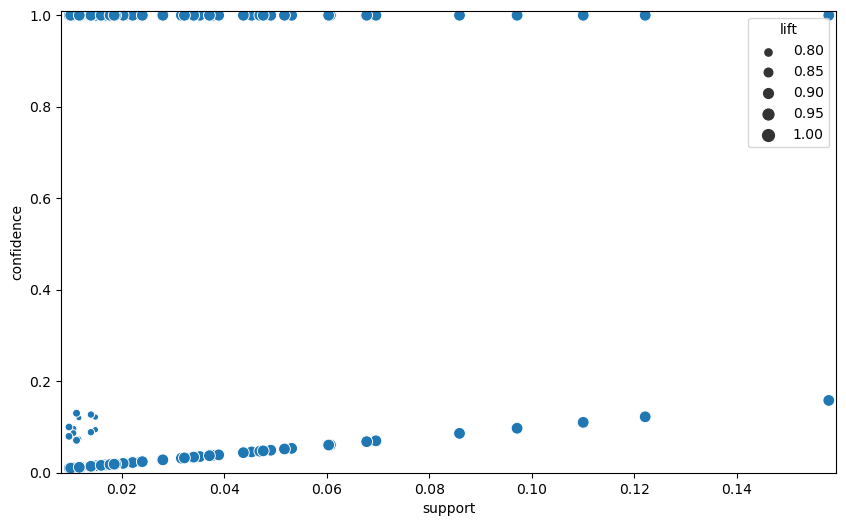

In [67]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

In [79]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

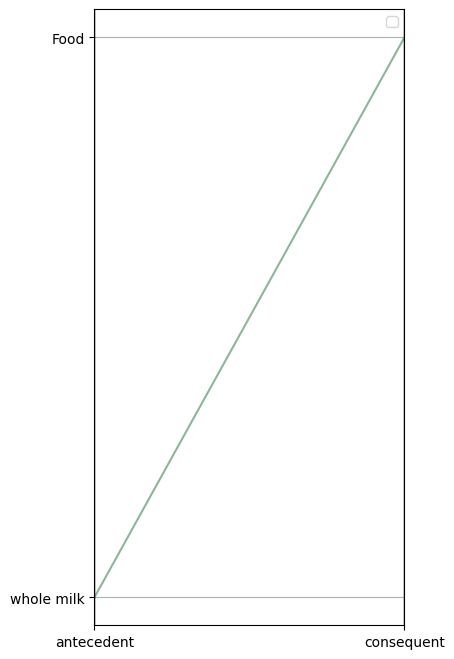

In [84]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.15, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.55)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()